# Social Network Analysis

I will use [NetowrkX library]to analyse Stack Overflow Tag Network.

The dataset is stored in two files:

1. stack_network_nodes.csv -- contains nodes of the network, i.e. the tags used by developers at Stack Overflow in their [Developer Stories]
2. stack_network_links.csv -- contains links of the network, i.e. pairs of tags that appear often together in the Developer Stories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


1. Read data from the files

In [4]:
# Read network nodes
def load_nodes_data(fname):
    nodes = []
    
    with open(fname) as F:
        next(F) # skip the header line
        for line in F:
            p = line.strip()
            nodes.append(p)    
    
    return np.array(nodes)

In [5]:
nodes = load_nodes_data('stack_network_nodes.csv')
node_labels=dict(zip(nodes,nodes))

In [6]:
# Read network edges
def load_edges_data(fname):
    edges = []
    
    with open(fname) as F:
        next(F) # skip the header line
        for line in F:
            p = line.strip().split(',')
            edges.append(np.array(p))    
    
    return np.array(edges)

In [7]:
edges = load_edges_data('stack_network_links.csv')

2. Construct and visualise the resulting undirected graph

In [8]:
def draw_graph(figsize,pos,G,node_size,title,node_color='g',node_alpha=0.6,node_labels=[]): # labels could choose 'None'
    #nx.draw(G)
    fig = plt.figure(figsize=figsize)

    nx.draw_networkx_nodes(G,
                        pos,
                        node_size=2000,
                        node_color=node_color,
                        alpha=node_alpha)

    nx.draw_networkx_edges(G,
                        pos,
                        edge_color='blue',
                        width=3,
                        alpha=0.5)

    # Draw labels if they are given
    if len(node_labels) != 0:
        nx.draw_networkx_labels(G, 
                            pos,
                            labels=node_labels,
                            font_color='blue',
                            font_size=72,
                            alpha=0.7,
                            verticalalignment='top')

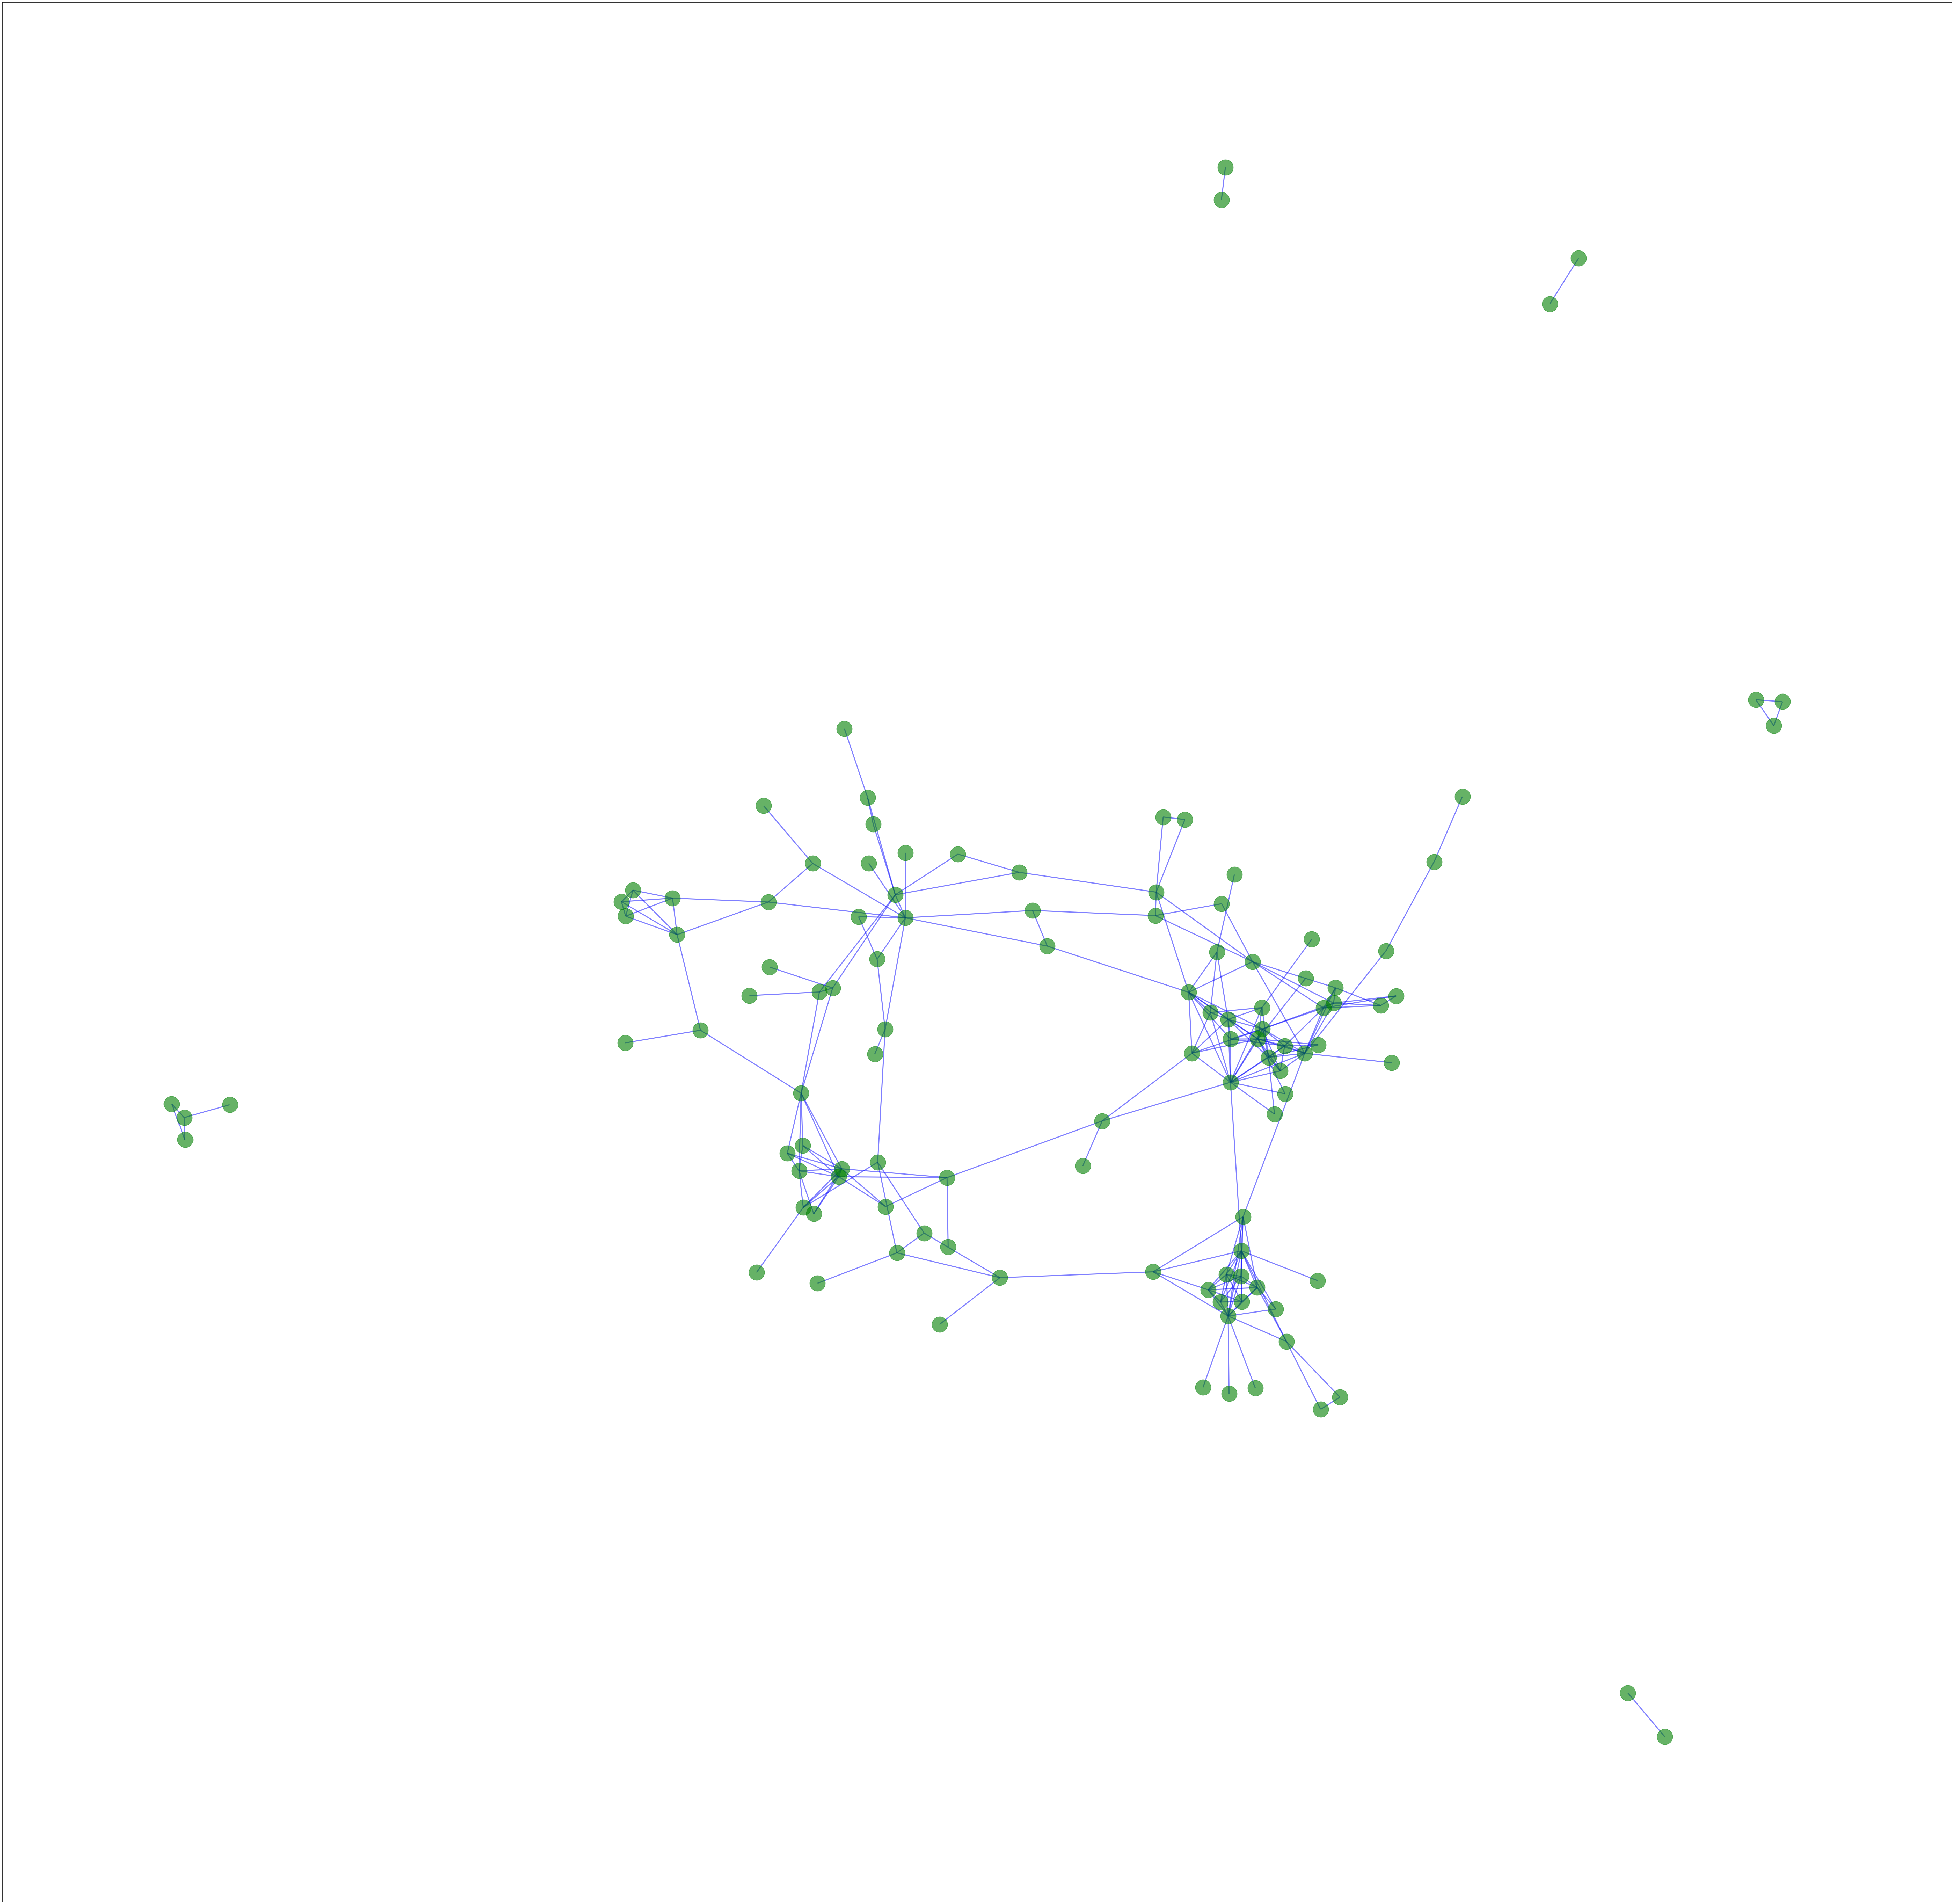

In [9]:
# Construct the graph
G= nx.Graph()
G.add_edges_from(edges)

# Visualise the graph
pos = nx.layout.spring_layout(G)
draw_graph(figsize=(100,100),
           pos=pos,
           G=G,
           node_size=2000,
           title='The whole tag network')

3. How many nodes/edges does the graph have?

In [10]:
# num of nodes and edges
num_nodes=len(nodes)
num_edges=len(edges)

print('Number of nodes =',num_nodes)
print('Number of edges =', num_edges)

Number of nodes = 115
Number of edges = 490



1. Compute degree centrality of all vertices. Plot degree centrality of those nodes.

In [12]:
# function to plot the top centrality measrure nodes
def top_cnt_plot(nodes_centrality, centrality_type):
    dict_items=nodes_centrality.items()
    dict_items_sorted=sorted(dict_items,key=lambda item:item[1],reverse=True)
    # plot the bar chart for the top centrality measrure nodes
    top_10_tag=dict_items_sorted[:10]
    top_tag=[]
    top_cnt=[]
    for tag in top_10_tag:
        top_tag.append(tag[0])
        top_cnt.append(tag[1])
        
    fig = plt.figure(figsize=(11,4))
    plt.title('The top 10 '+centrality_type+' centrality nodes',fontsize=14)
    plt.bar(top_tag,top_cnt,color='blue',alpha=0.75)

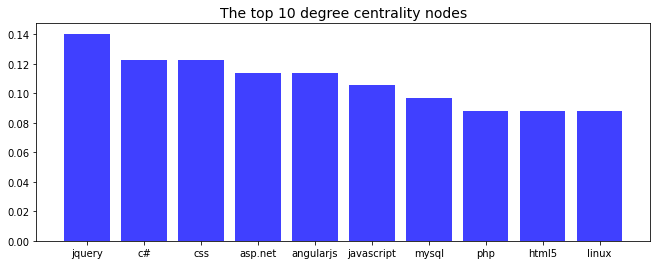

In [13]:
degree_cnt = nx.degree_centrality(G)
top_cnt_plot(degree_cnt, 'degree')

2. Compute closeness centrality of all vertices.Plot closeness centrality of those nodes.

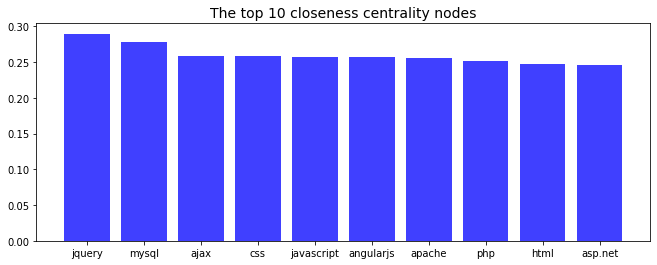

In [14]:
closeness_cnt = nx.closeness_centrality(G)
top_cnt_plot(closeness_cnt, 'closeness')

3. Compute betweenness centrality of all vertices. Plot betweenness centrality of those nodes.

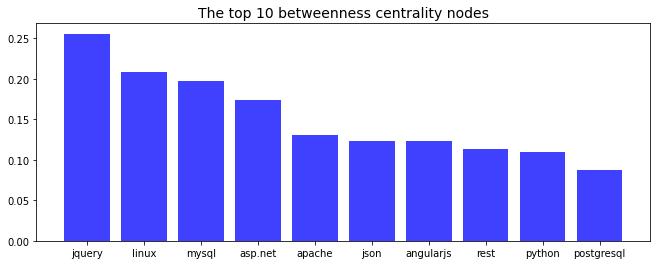

In [16]:
betweenness_cnt = nx.betweenness_centrality(G)
top_cnt_plot(betweenness_cnt, 'betweenness')


1. Find the number of connected components in the graph

In [17]:
# Find the number of connected components in the graph
num_comp = nx.number_connected_components(G)
print("Number of connected components:", num_comp)

Number of connected components: 6


2. Print the number of nodes in every connected component; for every connected component with at most 10 vertices, list the tags (node labels) of that component

In [18]:
# Print the number of nodes in every connected component and the nodes of all small components
for k, comp in enumerate(nx.connected_components(G)):
    if len(comp) <= 10:
        print("Connected component", k+1, "has", len(comp), "vertices:", comp)
    else:
        print("Connected component", k+1, "has", len(comp), "vertices")


Connected component 1 has 102 vertices
Connected component 2 has 2 vertices: {'tdd', 'agile'}
Connected component 3 has 4 vertices: {'scala', 'haskell', 'apache-spark', 'hadoop'}
Connected component 4 has 3 vertices: {'excel-vba', 'excel', 'vba'}
Connected component 5 has 2 vertices: {'perl', 'regex'}
Connected component 6 has 2 vertices: {'selenium', 'testing'}



1. Remove from the graph all components with at most 10 vertices

In [19]:
# Remove small components from the graph
for comp in list(nx.connected_components(G)):
    if len(comp) <=10:
        for node in comp:
            G.remove_node(node)

2. Draw the resulting graph

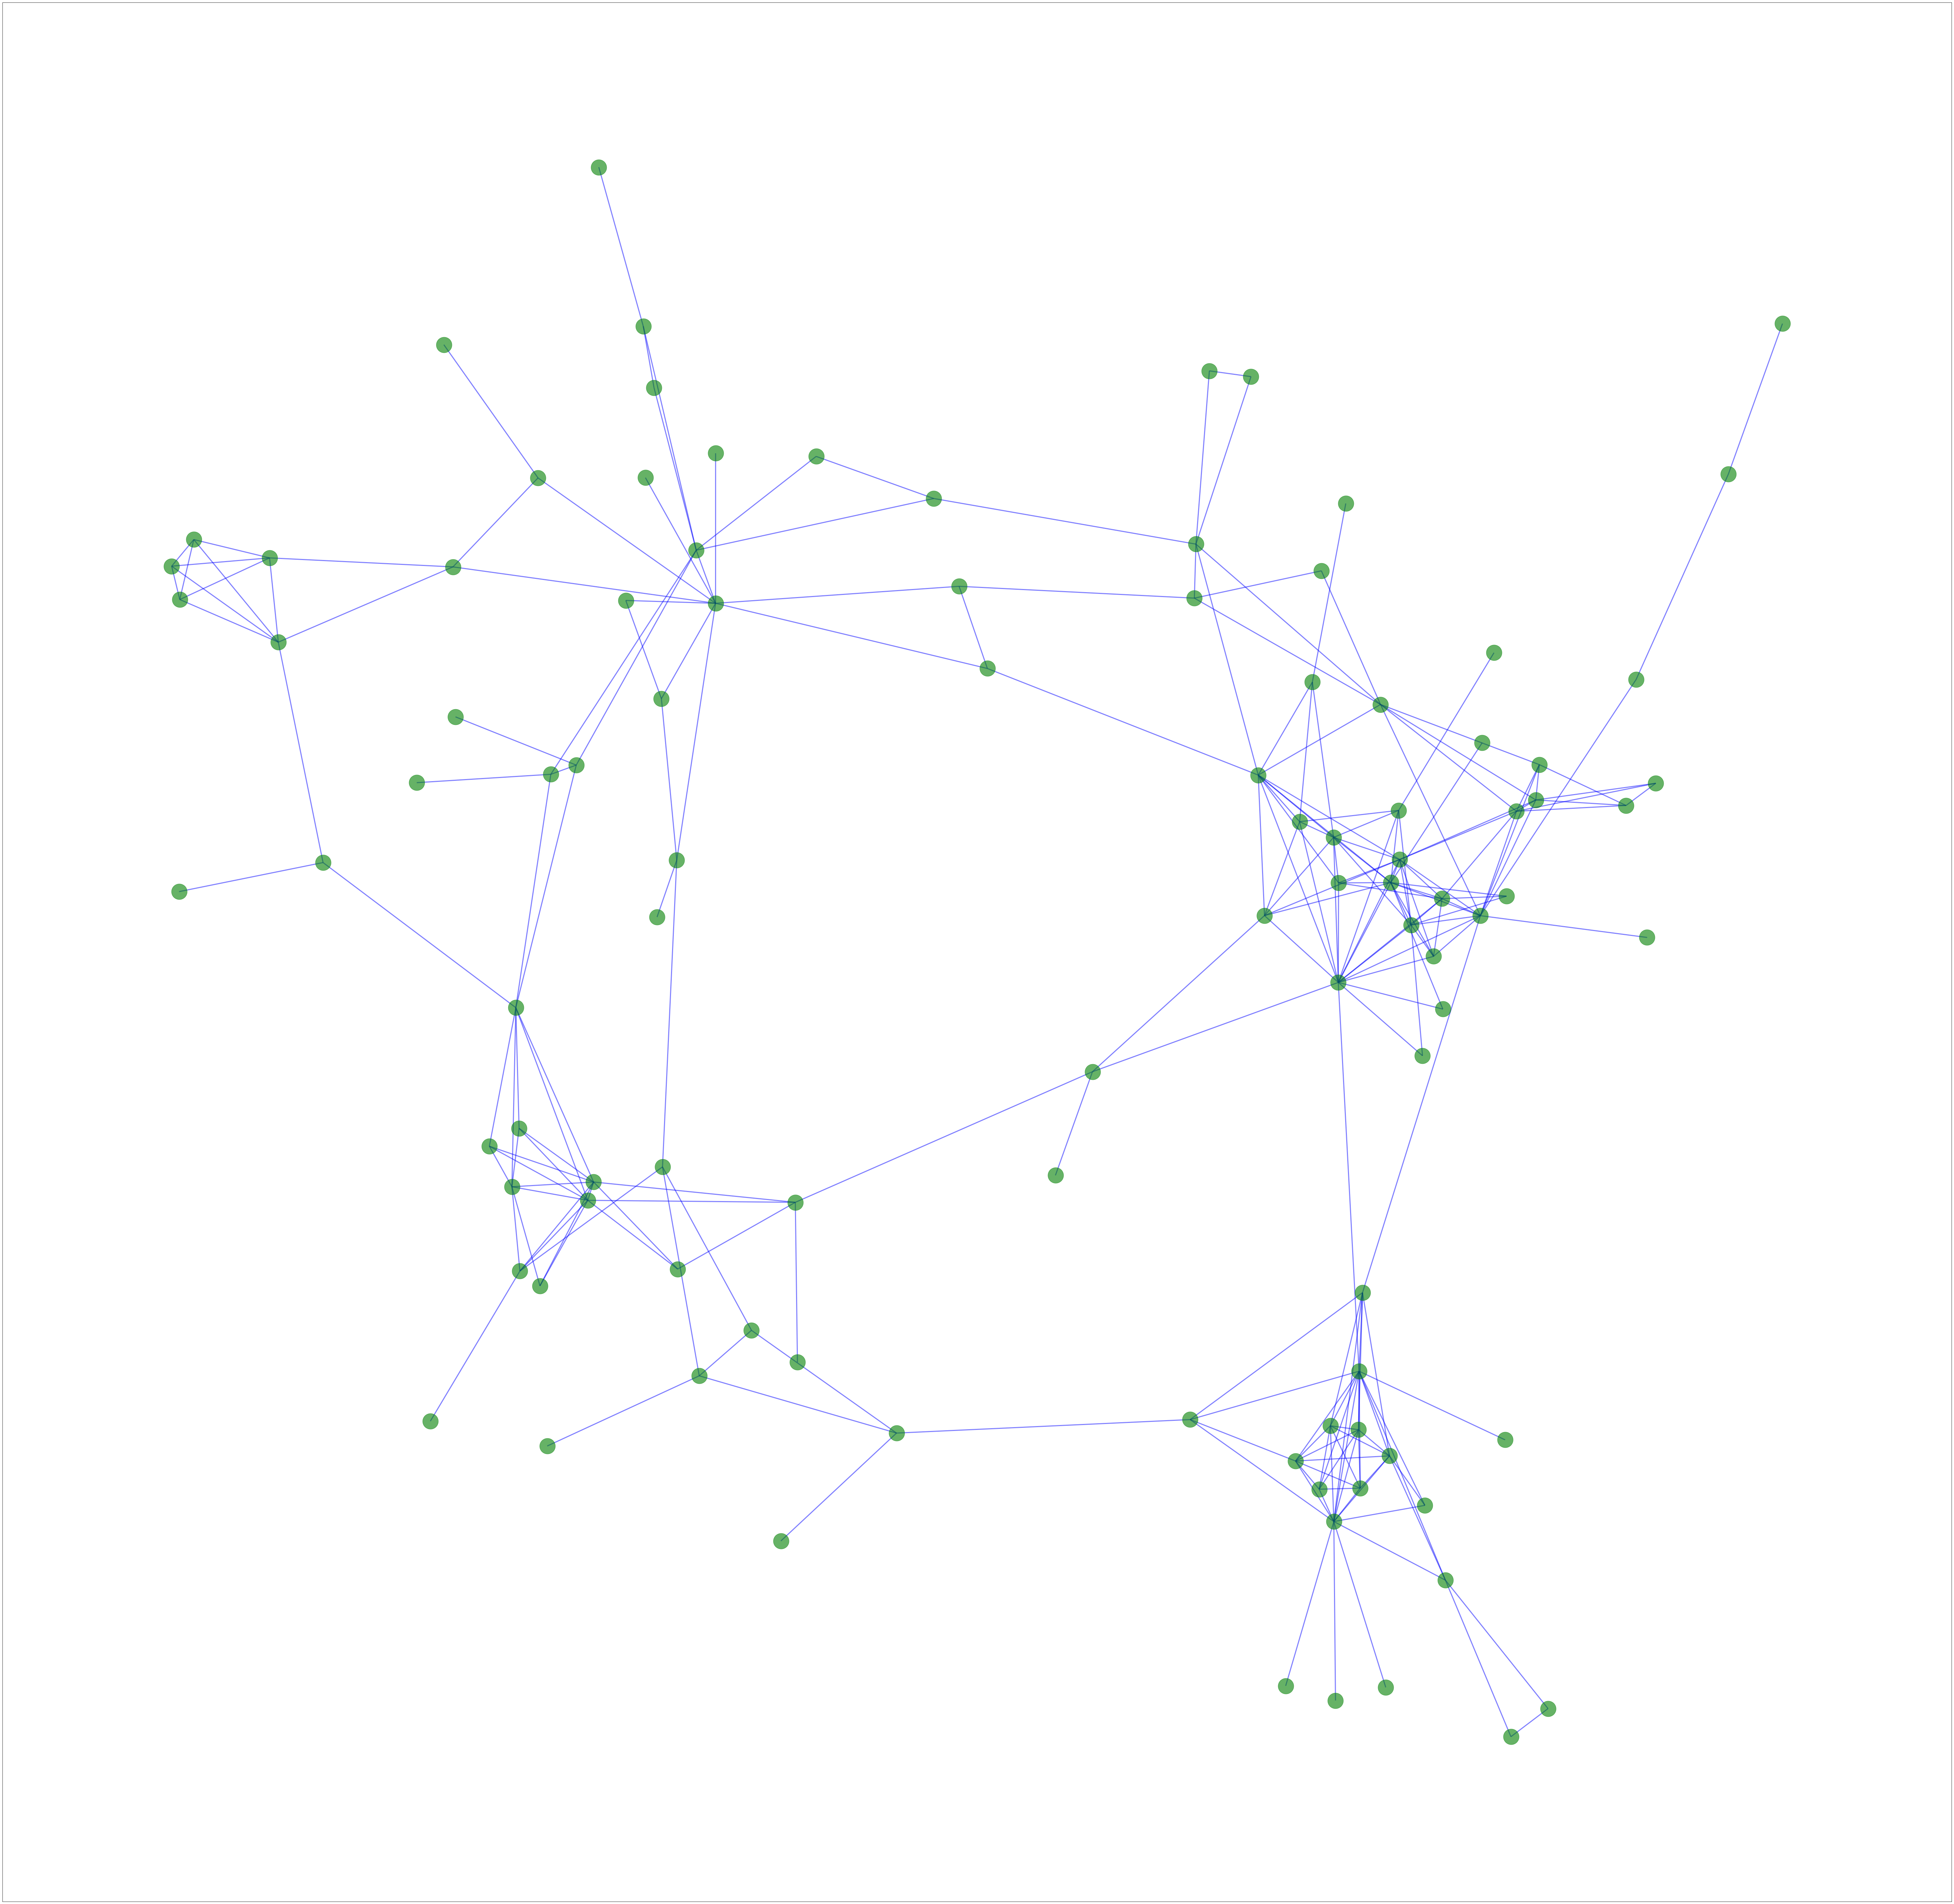

In [20]:
# Draw the resulting graph
draw_graph(figsize=(100,100),
           pos=pos,
           G=G,
           node_size=2000,
           title='Tag network without small connected components')


1. Partition the graph (the one in which we removde small connected components) into 4 communities using Girvan–Newman algorithm. Print the nodes of every community.

In [21]:
# Partition the resulting graph into 4 communities using Girvan–Newman algorithm.
# Print the nodes of every community.
k=4
hierarchy_of_communities = nx.algorithms.community.centrality.girvan_newman(G)
color_dict = {}

for communities in hierarchy_of_communities:
    if len(communities) == k:
        for i, comm in enumerate(communities):
            print("Community", i+1, ": ", comm, "\n")
            # Fill in the color map
            for node in comm:
                color_dict[node] = i+1

Community 1 :  {'entity-framework', 'unity3d', 'linq', 'oracle', 'mvc', 'c#', 'sql', 'vb.net', 'plsql', 'asp.net-web-api', 'sql-server', 'xamarin', '.net', 'wcf', 'visual-studio', 'asp.net', 'azure', 'wpf'} 

Community 2 :  {'elasticsearch', 'mysql', 'json', 'twitter-bootstrap', 'redux', 'codeigniter', 'html', 'bootstrap', 'express', 'postgresql', 'ajax', 'less', 'ruby-on-rails', 'sass', 'drupal', 'redis', 'php', 'jquery', 'xml', 'angular2', 'photoshop', 'react-native', 'typescript', 'ruby', 'node.js', 'ionic-framework', 'javascript', 'mongodb', 'laravel', 'angularjs', 'reactjs', 'twitter-bootstrap-3', 'wordpress', 'css', 'angular', 'vue.js', 'html5'} 

Community 3 :  {'apache', 'amazon-web-services', 'windows', 'jenkins', 'linux', 'docker', 'iphone', 'git', 'unix', 'github', 'powershell', 'nginx', 'devops', 'bash', 'shell', 'ios', 'xcode', 'android-studio', 'swift', 'go', 'objective-c', 'android', 'cloud', 'osx', 'ubuntu'} 

Community 4 :  {'api', 'django', 'spring', 'r', 'web-service

2. Draw the resulting graph in which nodes of different communities have different colors.

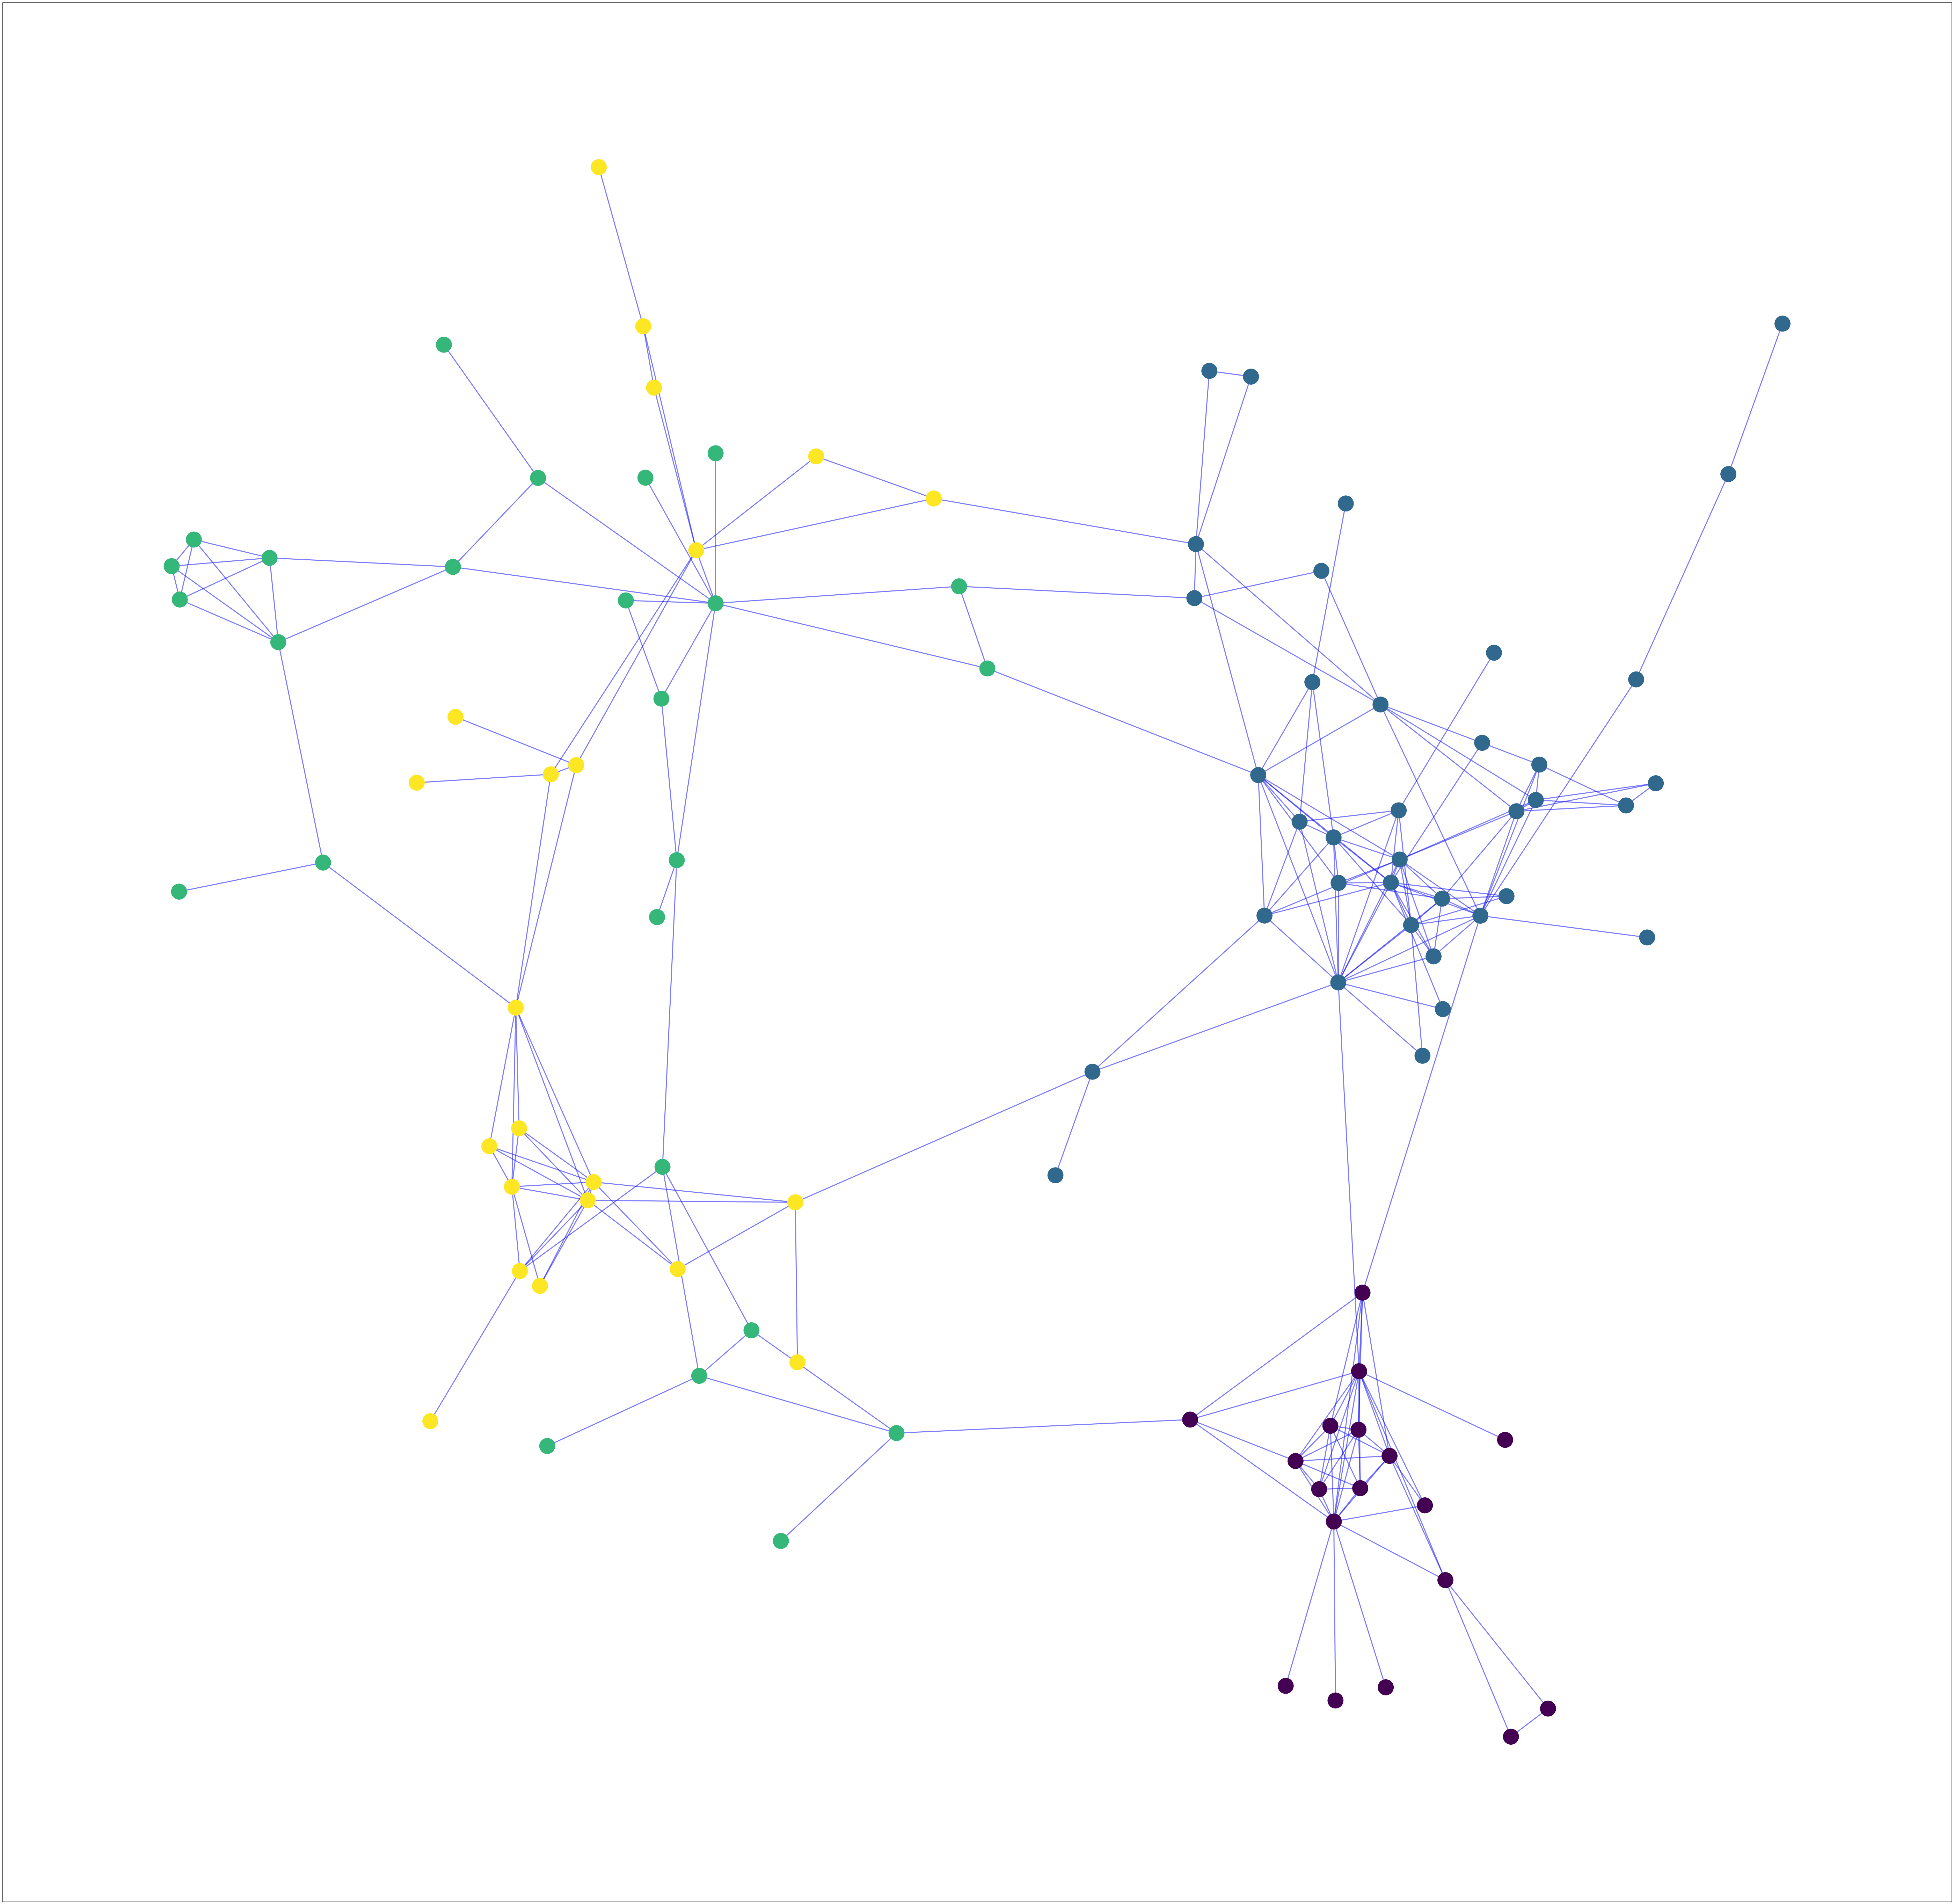

In [22]:
# Draw the resulting graph in which nodes of different communities have different colors
color_map = []
for node in G:
    color_map.append(color_dict[node])
    
draw_graph(figsize=(100,100),
           pos=pos,
           G=G,
           node_size=2000,
           title='Whole tag network',
           node_color=color_map,
           node_alpha=1)